In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

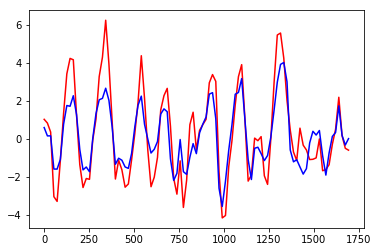

In [36]:
# (a)
fn = 'sol_vel.dat'
t, vH, vCa = np.loadtxt(fn,unpack = True, usecols = [0,1,2])
t = t * 60
plt.plot(t, vH, 'r')
plt.plot(t, vCa, 'b')

Text(0.5, 0, 'frequency(1/s)')

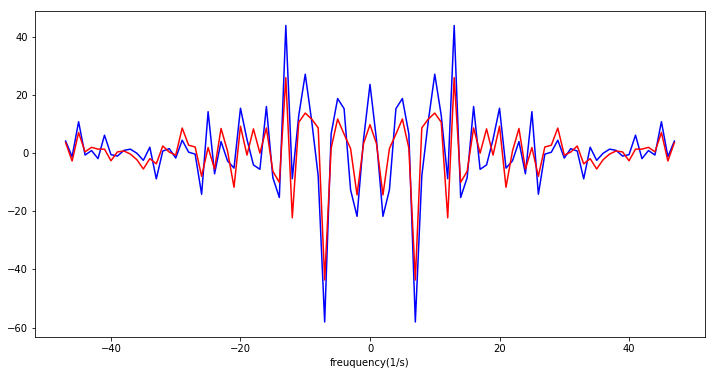

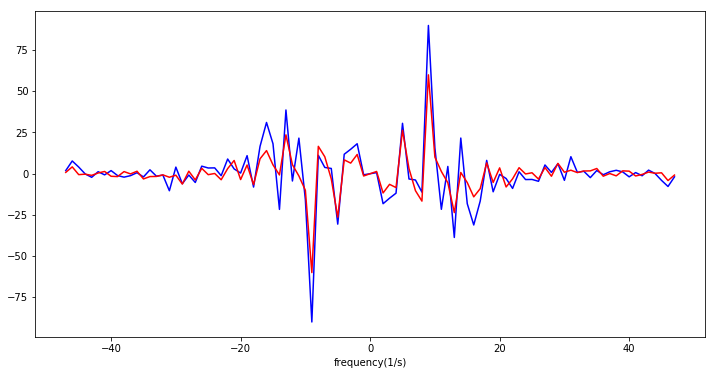

In [37]:
# (b)
F1 = np.fft.fft(vH)
F1 = np.fft.fftshift(F1)

F2 = np.fft.fft(vCa)
F2 = np.fft.fftshift(F2)

n = len(t)
k = np.fft.fftfreq(n, 1 / n)
k = np.fft.fftshift(k)

plt.figure(1, figsize = (12,6))
plt.plot(k, F1.real,'b')
plt.plot(k, F2.real,'r')
plt.xlabel('freuquency(1/s)')

plt.figure(2, figsize = (12,6))
plt.plot(k, F1.imag,'b')
plt.plot(k, F2.imag,'r')
plt.xlabel('frequency(1/s)')


In [47]:
# (c) H - alpha peak frequency
abs_real1, abs_imag1 = (np.abs(F1.real)).tolist(),(np.abs(F1.imag)).tolist()
print('cos component : %.6f'%abs(k[abs_real1.index(max(abs_real1))])
     ,'sin component : %.6f'%abs(k[abs_imag1.index(max(abs_imag1))]))

cos component : 7.000000 sin component : 9.000000


In [48]:
# (c) Ca II peak frequency
abs_real2, abs_imag2 = (np.abs(F2.real)).tolist(),(np.abs(F2.imag)).tolist()
print('cos component : %.6f'%abs(k[abs_real2.index(max(abs_real2))])
     ,'sin component : %.6f'%abs(k[abs_imag2.index(max(abs_imag2))]))

cos component : 7.000000 sin component : 9.000000


In [51]:
# 따라서 H-alpha 의 주기
print('{}s'.format(np.amax(t) / abs(k[abs_real1.index(max(abs_real1))])))

241.71428571428572s


In [52]:
# 따라서 Ca II 의 주기
print('{}s'.format(np.amax(t) / abs(k[abs_real2.index(max(abs_real2))])))

241.71428571428572s


c:\users\jhoon\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


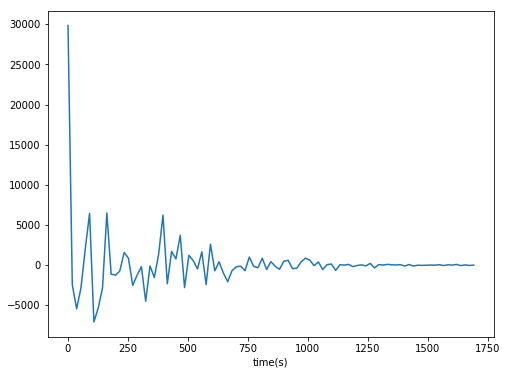

In [63]:
Corr = signal.correlate(F1, F2, method = 'fft')
plt.figure(1, figsize= (8,6))
plt.xlabel('time(s)')
plt.plot(t,Corr[94:190])